In [27]:
from pathlib import Path
import nibabel as nib
from cogpred.utils.configuration import get_config
import numpy as np
from sklearn.utils import Bunch
config = get_config()


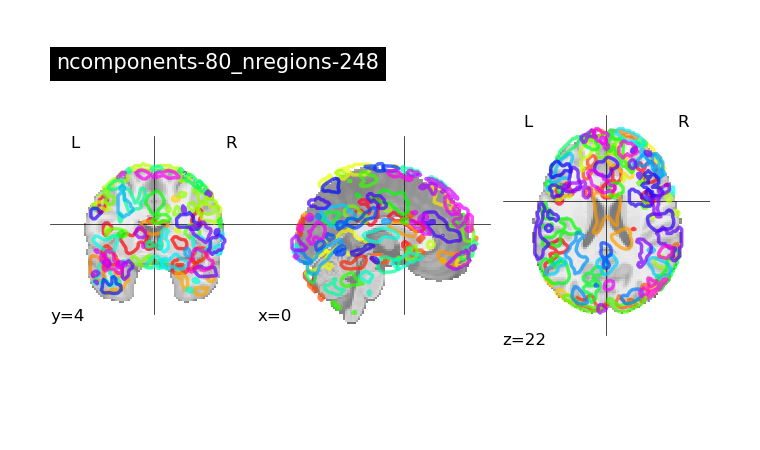

In [28]:
from neuroginius.atlas import Atlas, atlas_mapping

i_path = Path(config["parcellations"]) / "ncomponents-80_nregions-248"
atlas = Atlas.from_path(i_path)
atlas.plot()

In [29]:
from cogpred.loading import make_training_data

conn_dir = config["connectivity_matrices"]
ATLAS = "msdl" # We don't really care about the atlas
k = 3
_, metadata = make_training_data(conn_dir, ATLAS, k)
func_filename = metadata.sample(n=1, random_state=1234).file_path.values[0]

Dropping 9 subjects because of lacking MMMSE


In [30]:
masker = atlas.fit_masker()
masked = masker.transform_single_imgs(func_filename)

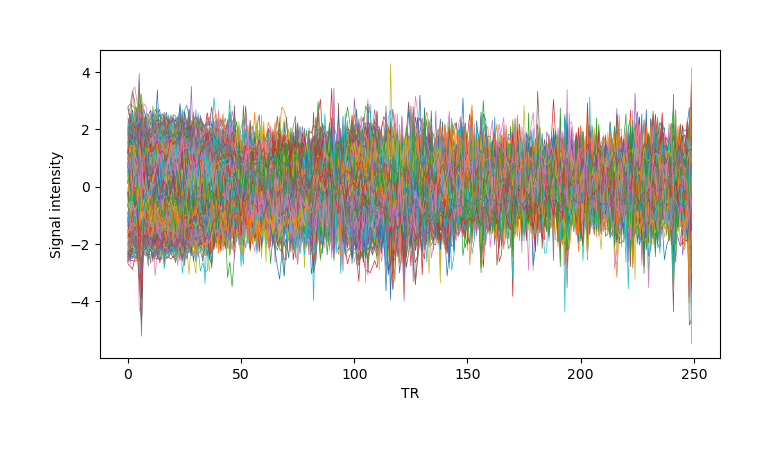

In [31]:
from scipy.stats import zscore
from cogpred.plotting import plot_ts
import matplotlib.pyplot as plt
masked = zscore(masked)
plot_ts(masked)
plt.show()

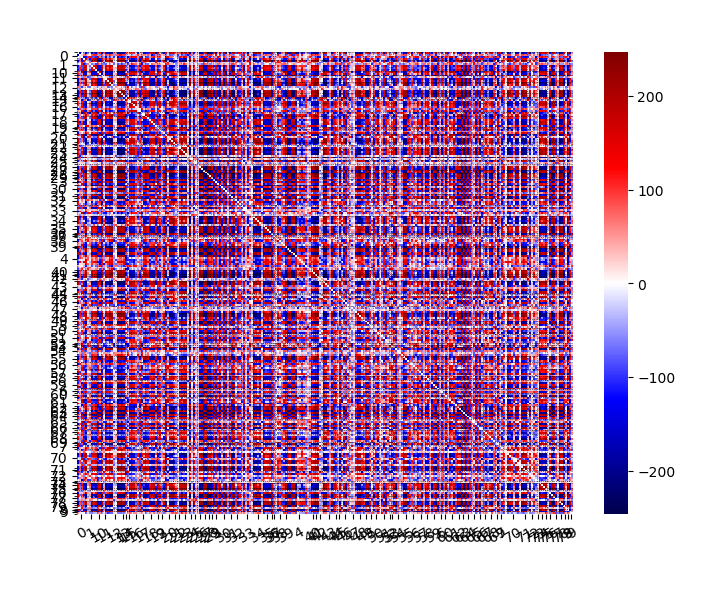

In [32]:
from neuroginius.plotting import plot_matrix
plot_matrix(masked.T @ masked, atlas)
plt.show()